<a href="https://colab.research.google.com/github/Felix-yaw/FELIX-PROJECTS/blob/main/Prediction%20of%20Stock%20with%20Python(Regression)%20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

In [3]:
df =pd.read_csv('GOOG.csv')
df

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,GOOG,2016-06-14 00:00:00+00:00,718.27,722.470,713.1200,716.48,1306065,718.27,722.470,713.1200,716.48,1306065,0.0,1.0
1,GOOG,2016-06-15 00:00:00+00:00,718.92,722.980,717.3100,719.00,1214517,718.92,722.980,717.3100,719.00,1214517,0.0,1.0
2,GOOG,2016-06-16 00:00:00+00:00,710.36,716.650,703.2600,714.91,1982471,710.36,716.650,703.2600,714.91,1982471,0.0,1.0
3,GOOG,2016-06-17 00:00:00+00:00,691.72,708.820,688.4515,708.65,3402357,691.72,708.820,688.4515,708.65,3402357,0.0,1.0
4,GOOG,2016-06-20 00:00:00+00:00,693.71,702.480,693.4100,698.77,2082538,693.71,702.480,693.4100,698.77,2082538,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1253,GOOG,2021-06-07 00:00:00+00:00,2466.09,2468.000,2441.0725,2451.32,1192453,2466.09,2468.000,2441.0725,2451.32,1192453,0.0,1.0
1254,GOOG,2021-06-08 00:00:00+00:00,2482.85,2494.495,2468.2400,2479.90,1253253,2482.85,2494.495,2468.2400,2479.90,1253253,0.0,1.0
1255,GOOG,2021-06-09 00:00:00+00:00,2491.40,2505.000,2487.3300,2499.50,1006337,2491.40,2505.000,2487.3300,2499.50,1006337,0.0,1.0
1256,GOOG,2021-06-10 00:00:00+00:00,2521.60,2523.260,2494.0000,2494.01,1561733,2521.60,2523.260,2494.0000,2494.01,1561733,0.0,1.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   symbol       1258 non-null   object 
 1   date         1258 non-null   object 
 2   close        1258 non-null   float64
 3   high         1258 non-null   float64
 4   low          1258 non-null   float64
 5   open         1258 non-null   float64
 6   volume       1258 non-null   int64  
 7   adjClose     1258 non-null   float64
 8   adjHigh      1258 non-null   float64
 9   adjLow       1258 non-null   float64
 10  adjOpen      1258 non-null   float64
 11  adjVolume    1258 non-null   int64  
 12  divCash      1258 non-null   float64
 13  splitFactor  1258 non-null   float64
dtypes: float64(10), int64(2), object(2)
memory usage: 137.7+ KB


In [5]:
df.corr(numeric_only= True)

,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
close,1.000000,0.999528,0.999586,0.999083,-0.025574,1.000000,0.999528,0.999586,0.999083,-0.025574,NaN,NaN
high,0.999528,1.000000,0.999354,0.999575,-0.012470,0.999528,1.000000,0.999354,0.999575,-0.012470,NaN,NaN
low,0.999586,0.999354,1.000000,0.999499,-0.035184,0.999586,0.999354,1.000000,0.999499,-0.035184,NaN,NaN
open,0.999083,0.999575,0.999499,1.000000,-0.021381,0.999083,0.999575,0.999499,1.000000,-0.021381,NaN,NaN
volume,-0.025574,-0.012470,-0.035184,-0.021381,1.000000,-0.025574,-0.012470,-0.035184,-0.021381,1.000000,NaN,NaN
adjClose,1.000000,0.999528,0.999586,0.999083,-0.025574,1.000000,0.999528,0.999586,0.999083,-0.025574,NaN,NaN
adjHigh,0.999528,1.000000,0.999354,0.999575,-0.012470,0.999528,1.000000,0.999354,0.999575,-0.012470,NaN,NaN
adjLow,0.999586,0.999354,1.000000,0.999499,-0.035184,0.999586,0.999354,1.000000,0.999499,-0.035184,NaN,NaN
adjOpen,0.999083,0.999575,0.999499,1.000000,-0.021381,0.999083,0.999575,0.999499,1.000000,-0.021381,NaN,NaN
adjVolume,-0.025574,-0.012470,-0.035184,-0.021381,1.000000,-0.025574,-0.012470,-0.035184,-0.021381,1.000000,NaN,NaN


In [6]:
df.shape

(1258, 14)

In [7]:
df2 = df[['date','close',	'high',	'low',	'open',	'volume']]
df2

,date,close,high,low,open,volume
0,2016-06-14 00:00:00+00:00,718.27,722.470,713.1200,716.48,1306065
1,2016-06-15 00:00:00+00:00,718.92,722.980,717.3100,719.00,1214517
2,2016-06-16 00:00:00+00:00,710.36,716.650,703.2600,714.91,1982471
3,2016-06-17 00:00:00+00:00,691.72,708.820,688.4515,708.65,3402357
4,2016-06-20 00:00:00+00:00,693.71,702.480,693.4100,698.77,2082538
...,...,...,...,...,...,...
1253,2021-06-07 00:00:00+00:00,2466.09,2468.000,2441.0725,2451.32,1192453
1254,2021-06-08 00:00:00+00:00,2482.85,2494.495,2468.2400,2479.90,1253253
1255,2021-06-09 00:00:00+00:00,2491.40,2505.000,2487.3300,2499.50,1006337
1256,2021-06-10 00:00:00+00:00,2521.60,2523.260,2494.0000,2494.01,1561733


In [8]:
df2.duplicated().sum().any()
df2.isnull().sum().any()

False

In [9]:
df2.isnull().sum().any()

False

In [10]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    1258 non-null   object 
 1   close   1258 non-null   float64
 2   high    1258 non-null   float64
 3   low     1258 non-null   float64
 4   open    1258 non-null   float64
 5   volume  1258 non-null   int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 59.1+ KB


In [11]:
df2.corr(numeric_only=True)

,close,high,low,open,volume
close,1.000000,0.999528,0.999586,0.999083,-0.025574
high,0.999528,1.000000,0.999354,0.999575,-0.012470
low,0.999586,0.999354,1.000000,0.999499,-0.035184
open,0.999083,0.999575,0.999499,1.000000,-0.021381
volume,-0.025574,-0.012470,-0.035184,-0.021381,1.000000


<Axes: >

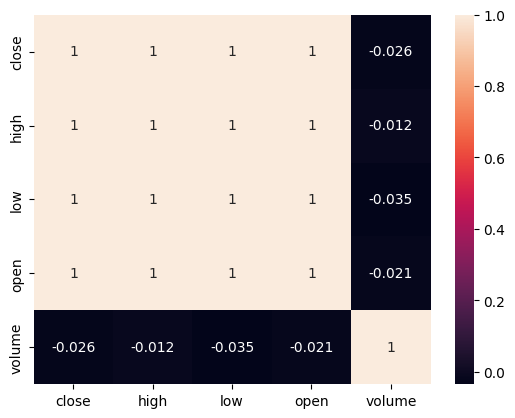

In [12]:
sns.heatmap(data = df2.corr(numeric_only = True), annot = True)

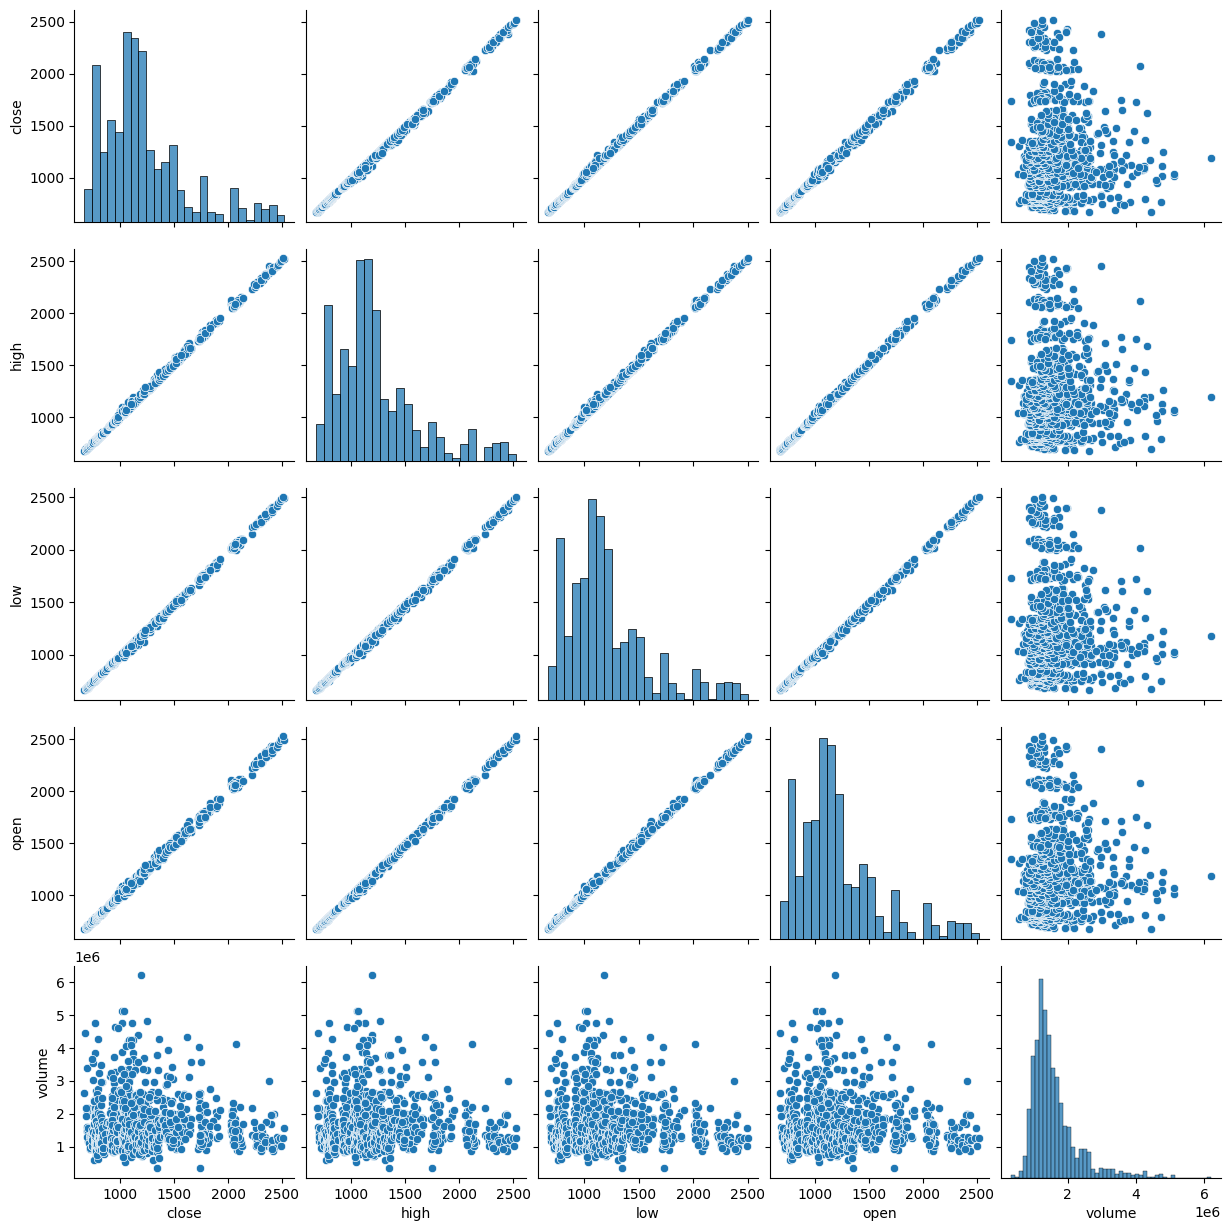

In [13]:
sns.pairplot(data = df2)

In [16]:
x= df2[['high', 'open', 'low', 'volume']]
y= df2['close']

In [17]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(x,y,test_size=0.2, random_state=42)

In [18]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(x_train, y_train)

LinearRegression()

In [20]:
predictions = lm.predict(x_test)

In [22]:
dfr=pd.DataFrame({'Actual':y_test, 'Precdicted':predictions})
dfr

,Actual,Precdicted
561,1186.48,1172.479060
101,762.02,765.798229
51,769.41,768.571286
63,759.69,759.732177
1073,1495.53,1484.814106
...,...,...
156,832.15,830.218188
549,1200.96,1197.081777
398,1105.52,1102.425656
243,966.95,964.727719


<ipython-input-23-6dd226caaeb2>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(residual)


<Axes: xlabel='close', ylabel='Density'>

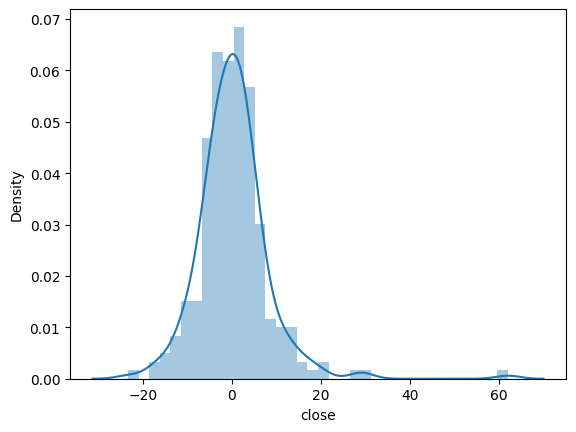

In [23]:
residual = y_test-predictions
sns.distplot(residual)

In [25]:
from sklearn.metrics import confusion_matrix, accuracy_score
regression_confidence = lm.score(x_test, y_test)
print(f'Regression Confidence: {regression_confidence}')

Regression Confidence: 0.9995180954136195


<Axes: xlabel='close'>

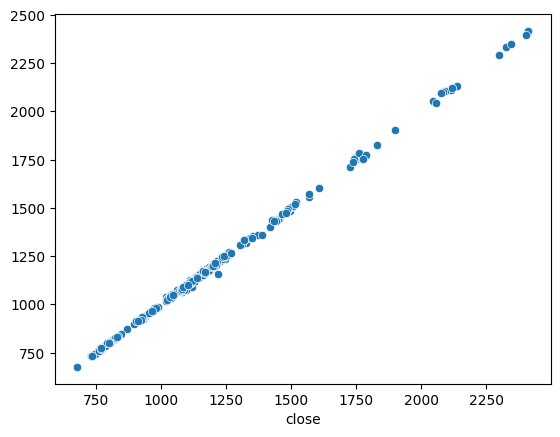

In [27]:
sns.scatterplot(x=y_test, y=predictions)

<Axes: >

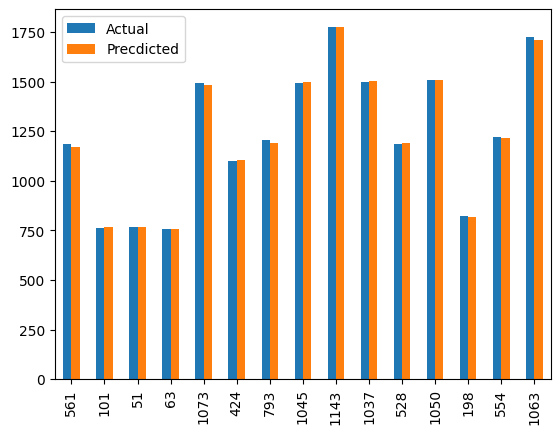

In [28]:
graph = dfr.head(15)
graph.plot(kind='bar')